# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1990 et se termine avec une semaine récente.

In [2]:
data_url = 'http://www.sentiweb.fr/datasets/all/inc-7-PAY.csv'

Des explications sur les variables sont données sur le [site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json).
La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant skiprows=1.

In [3]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202432          7   5126     1949    8303       8           3   
1     202431          7   4533     2225    6841       7           4   
2     202430          7   7004     4278    9730      11           7   
3     202429          7   9270     6303   12237      14          10   
4     202428          7   9364     6498   12230      14          10   
5     202427          7  10247     7090   13404      15          10   
6     202426          7  14368    10399   18337      22          16   
7     202425          7  11174     8039   14309      17          12   
8     202424          7  12621     9357   15885      19          14   
9     202423          7  14657    11339   17975      22          17   
10    202422          7  11628     8361   14895      17          12   
11    202421          7   9701     6851   12551      15          11   
12    202420          7  13661    10209   17113      20          15   
13    202419          7  10083     6413   13753      15           9   
14    202418          7  13438     9514   17362      20          14   
15    202417          7  15303    11219   19387      23          17   
16    202416          7  18138    13540   22736      27          20   
17    202415          7  24929    17315   32543      37          26   
18    202414          7  16181    12544   19818      24          19   
19    202413          7  18322    14206   22438      27          21   
20    202412          7  12818     9128   16508      19          13   
21    202411          7  15973    12400   19546      24          19   
22    202410          7  14301    10761   17841      21          16   
23    202409          7  14337    10871   17803      21          16   
24    202408          7  15899    11991   19807      24          18   
25    202407          7  11294     8226   14362      17          12   
26    202406          7  12174     9020   15328      18          13   
27    202405          7   8814     6110   11518      13           9   
28    202404          7   9504     6566   12442      14          10   
29    202403          7   6948     4633    9263      10           7   
...      ...        ...    ...      ...     ...     ...         ...   
1728  199126          7  17608    11304   23912      31          20   
1729  199125          7  16169    10700   21638      28          18   
1730  199124          7  16171    10071   22271      28          17   
1731  199123          7  11947     7671   16223      21          13   
1732  199122          7  15452     9953   20951      27          17   
1733  199121          7  14903     8975   20831      26          16   
1734  199120          7  19053    12742   25364      34          23   
1735  199119          7  16739    11246   22232      29          19   
1736  199118          7  21385    13882   28888      38          25   
1737  199117          7  13462     8877   18047      24          16   
1738  199116          7  14857    10068   19646      26          18   
1739  199115          7  13975     9781   18169      25          18   
1740  199114          7  12265     7684   16846      22          14   
1741  199113          7   9567     6041   13093      17          11   
1742  199112          7  10864     7331   14397      19          13   
1743  199111          7  15574    11184   19964      27          19   
1744  199110          7  16643    11372   21914      29          20   
1745  199109          7  13741     8780   18702      24          15   
1746  199108          7  13289     8813   17765      23          15   
1747  199107          7  12337     8077   16597      22          15   
1748  199106          7  10877     7013   14741      19          12   
1749  199105          7  10442     6544   14340      18          11   
1750  199104          7   7913     4563   11263      14           8   
1751  199103          7  15387    10484   20290      27          18   
1752  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ?

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il n'y a pas de données manquantes. On va quand même faire une copie du data pour être raccord au modèle du cours.

In [6]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202432          7   5126     1949    8303       8           3   
1     202431          7   4533     2225    6841       7           4   
2     202430          7   7004     4278    9730      11           7   
3     202429          7   9270     6303   12237      14          10   
4     202428          7   9364     6498   12230      14          10   
5     202427          7  10247     7090   13404      15          10   
6     202426          7  14368    10399   18337      22          16   
7     202425          7  11174     8039   14309      17          12   
8     202424          7  12621     9357   15885      19          14   
9     202423          7  14657    11339   17975      22          17   
10    202422          7  11628     8361   14895      17          12   
11    202421          7   9701     6851   12551      15          11   
12    202420          7  13661    10209   17113      20          15   
13    202419          7  10083     6413   13753      15           9   
14    202418          7  13438     9514   17362      20          14   
15    202417          7  15303    11219   19387      23          17   
16    202416          7  18138    13540   22736      27          20   
17    202415          7  24929    17315   32543      37          26   
18    202414          7  16181    12544   19818      24          19   
19    202413          7  18322    14206   22438      27          21   
20    202412          7  12818     9128   16508      19          13   
21    202411          7  15973    12400   19546      24          19   
22    202410          7  14301    10761   17841      21          16   
23    202409          7  14337    10871   17803      21          16   
24    202408          7  15899    11991   19807      24          18   
25    202407          7  11294     8226   14362      17          12   
26    202406          7  12174     9020   15328      18          13   
27    202405          7   8814     6110   11518      13           9   
28    202404          7   9504     6566   12442      14          10   
29    202403          7   6948     4633    9263      10           7   
...      ...        ...    ...      ...     ...     ...         ...   
1728  199126          7  17608    11304   23912      31          20   
1729  199125          7  16169    10700   21638      28          18   
1730  199124          7  16171    10071   22271      28          17   
1731  199123          7  11947     7671   16223      21          13   
1732  199122          7  15452     9953   20951      27          17   
1733  199121          7  14903     8975   20831      26          16   
1734  199120          7  19053    12742   25364      34          23   
1735  199119          7  16739    11246   22232      29          19   
1736  199118          7  21385    13882   28888      38          25   
1737  199117          7  13462     8877   18047      24          16   
1738  199116          7  14857    10068   19646      26          18   
1739  199115          7  13975     9781   18169      25          18   
1740  199114          7  12265     7684   16846      22          14   
1741  199113          7   9567     6041   13093      17          11   
1742  199112          7  10864     7331   14397      19          13   
1743  199111          7  15574    11184   19964      27          19   
1744  199110          7  16643    11372   21914      29          20   
1745  199109          7  13741     8780   18702      24          15   
1746  199108          7  13289     8813   17765      23          15   
1747  199107          7  12337     8077   16597      22          15   
1748  199106          7  10877     7013   14741      19          12   
1749  199105          7  10442     6544   14340      18          11   
1750  199104          7   7913     4563   11263      14           8   
1751  199103          7  15387    10484   20290      27          18   
1752  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète. 

Un deuxième problème est que Pandas ne comprend pas les numéros de semaine. Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque isoweek. 

Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne 'period'.

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans le sens chronologique.

In [8]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laissons une "marge d'erreur" d'une seconde.

Ceci s'avère tout à fait juste.

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Aucune sortie car pas de discontinuité temporelle.

Un premier regard sur les données !

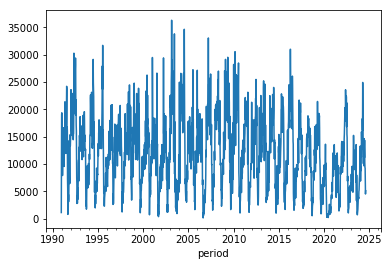

In [10]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

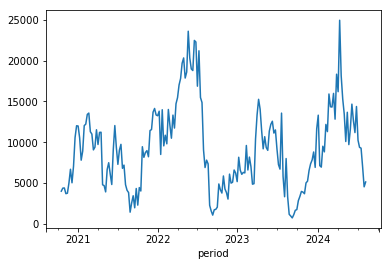

In [11]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval entre deux années civiles, nous définissons la période de référence entre deux minima de l'incidence, du 1er septembre de l'année N au 1er septembre de l'année N+1.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er septembre de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de la varicelle est très faible en été, cette modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent fin 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [12]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [13]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

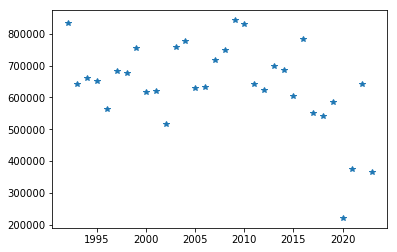

In [14]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [15]:
yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre bien que les épidémies fortes (jusque 800 000 cas), sont assez rares : il y en eu quatre au cours des 33 dernières années.

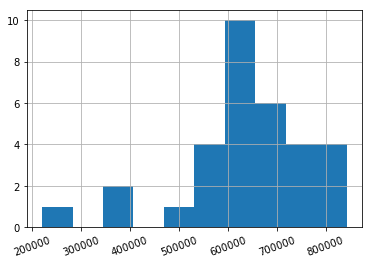

In [16]:
yearly_incidence.hist(xrot=20)